In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = 'country_wise_latest.csv' 
data = pd.read_csv(file_path)

data.head()
data = data.dropna(subset=['Confirmed', 'Deaths', 'Recovered', 'Active'])


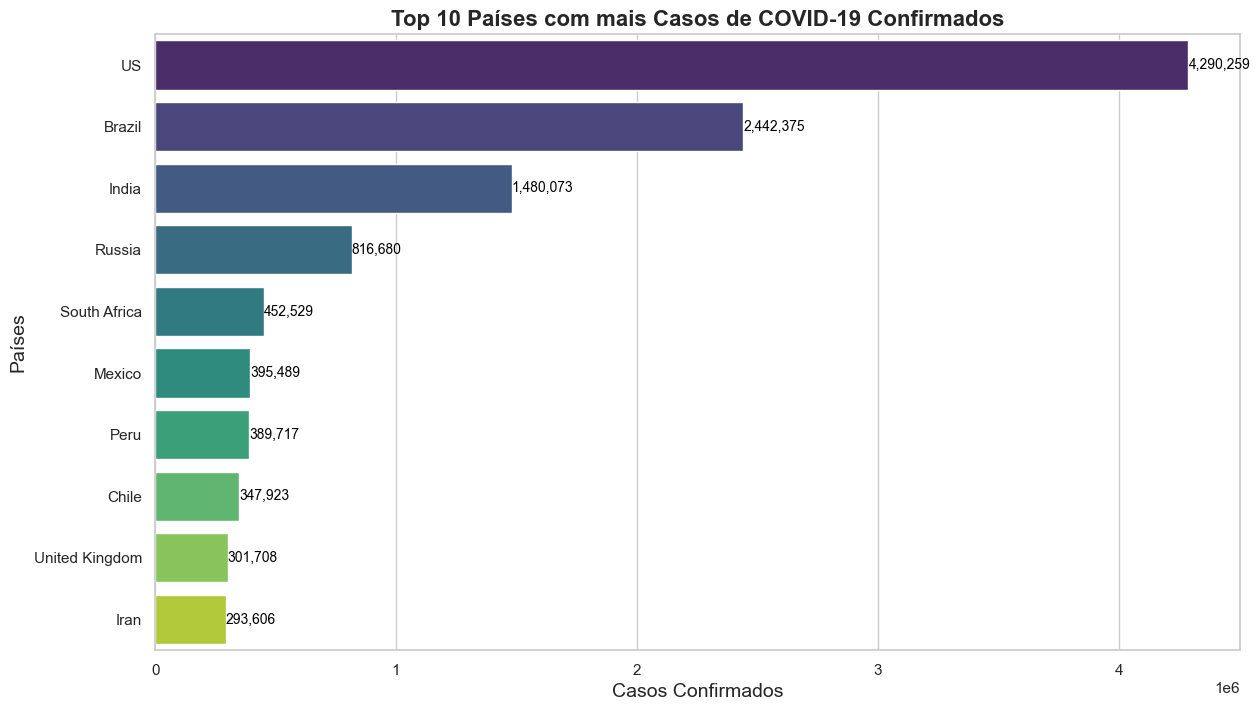

In [67]:
top_10_confirmados = data.nlargest(10, 'Confirmed')

plt.figure(figsize=(14, 8))
sns.barplot(x='Confirmed', y='Country/Region', data=top_10_confirmados, palette="viridis")

for indice, valor in enumerate(top_10_confirmados['Confirmed']):
    plt.text(valor, indice, f'{valor:,.0f}', va='center', color='black', fontsize=10)

plt.title("Top 10 Países com mais Casos de COVID-19 Confirmados", fontsize=16, fontweight='bold')
plt.xlabel("Casos Confirmados", fontsize=14)
plt.ylabel("Países", fontsize=14)

plt.show()

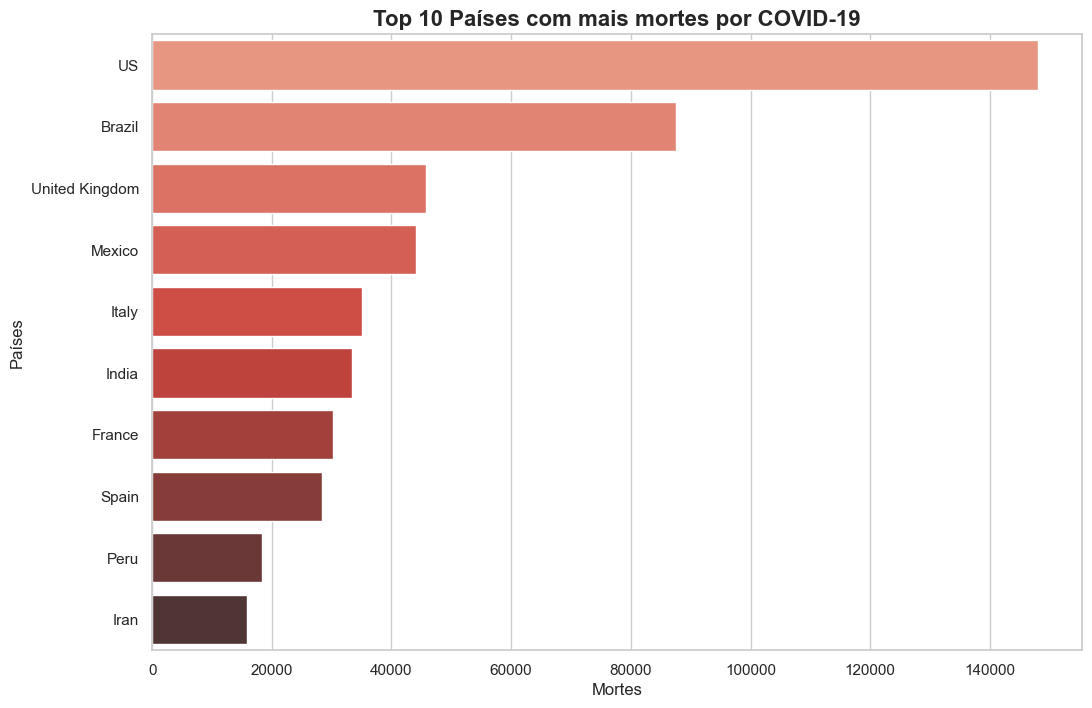

In [68]:
top_10_mortes = data.nlargest(10, 'Deaths')
plt.figure(figsize=(12, 8))
sns.barplot(x='Deaths', y='Country/Region', data=top_10_mortes, palette="Reds_d")
plt.title("Top 10 Países com mais mortes por COVID-19", fontsize=16, fontweight='bold')
plt.xlabel("Mortes")
plt.ylabel("Países")
plt.show()

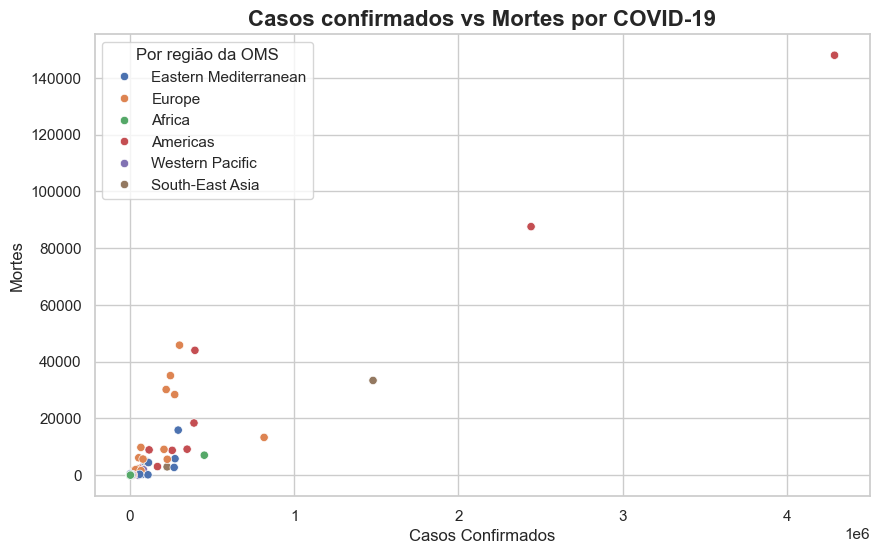

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confirmed', y='Deaths', hue='WHO Region', data=data)
plt.title("Casos confirmados vs Mortes por COVID-19", fontsize=16, fontweight='bold')
plt.xlabel("Casos Confirmados")
plt.ylabel("Mortes")
plt.legend(loc='upper left', title='Por região da OMS')
plt.show()

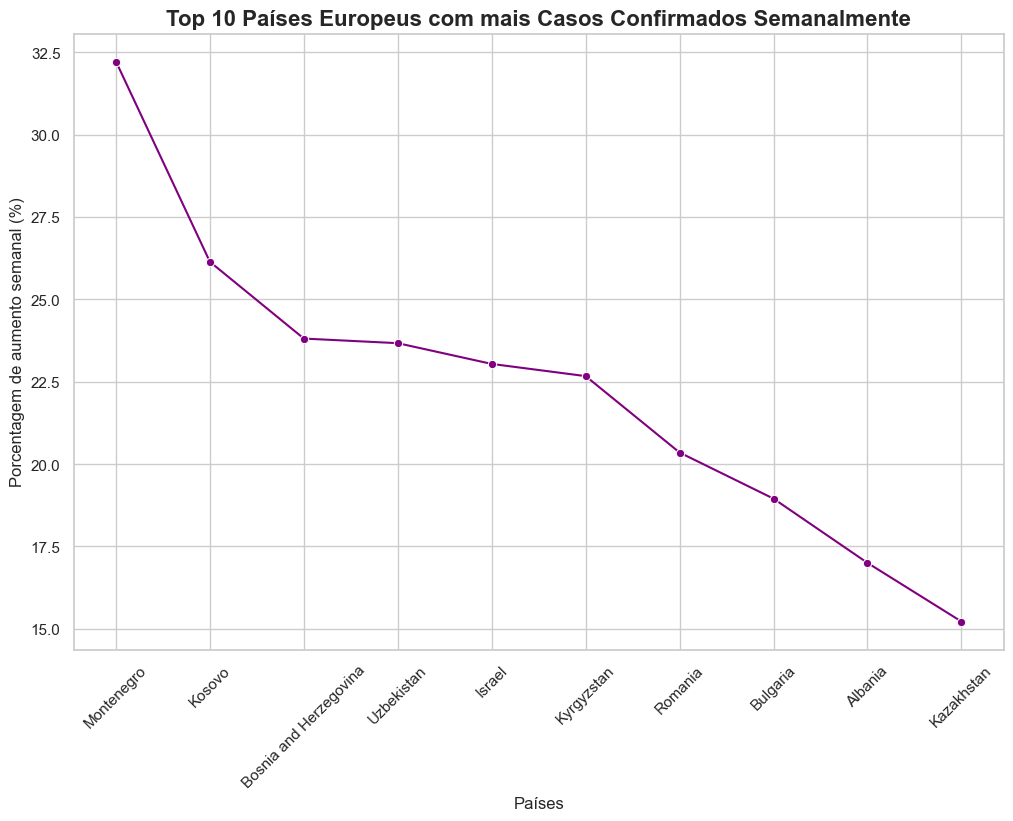

In [75]:
paises_europa = data[data['WHO Region'] == 'Europe']
paises_europa = paises_europa.nlargest(10, '1 week % increase')
plt.figure(figsize=(12, 8))
sns.lineplot(x='Country/Region', y='1 week % increase', data=paises_europa, marker='o', color="purple")
plt.title("Top 10 Países Europeus com mais Casos Confirmados Semanalmente", fontsize=16, fontweight='bold')
plt.xlabel("Países")
plt.ylabel("Porcentagem de aumento semanal (%)")
plt.xticks(rotation=45)
plt.show()

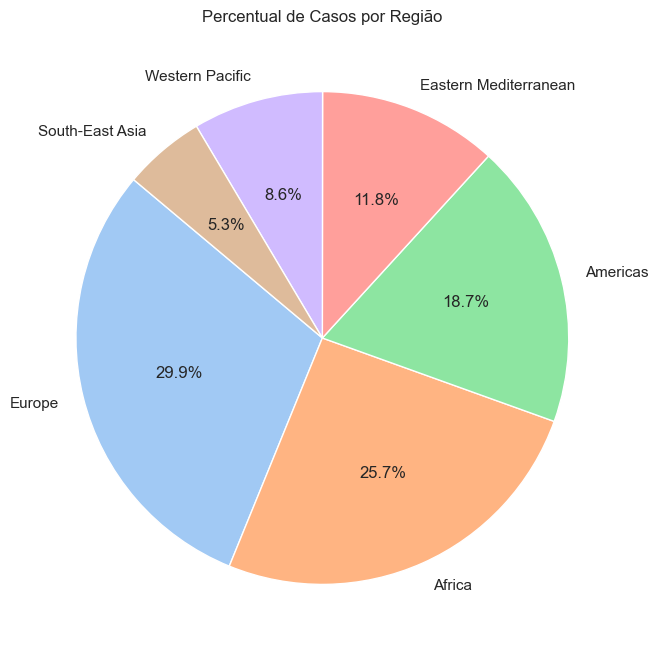

In [71]:
numero_regioes = data['WHO Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(numero_regioes, labels=numero_regioes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Percentual de Casos por Região")
plt.show()

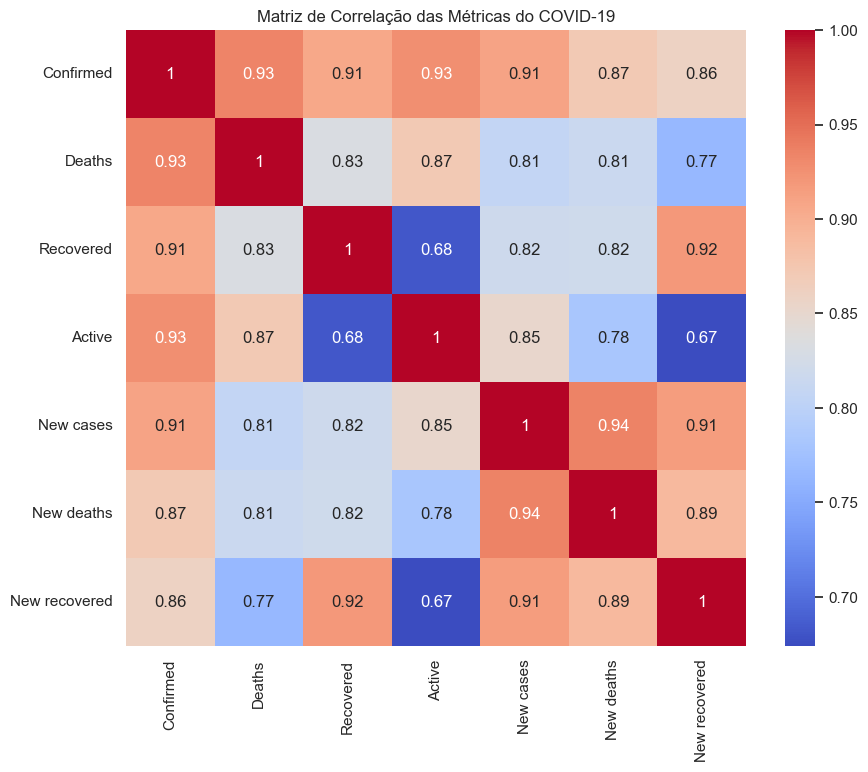

In [74]:
metricas_covid = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']]
matrix_correlacao = metricas_covid.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlacao, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação das Métricas do COVID-19")
plt.show()

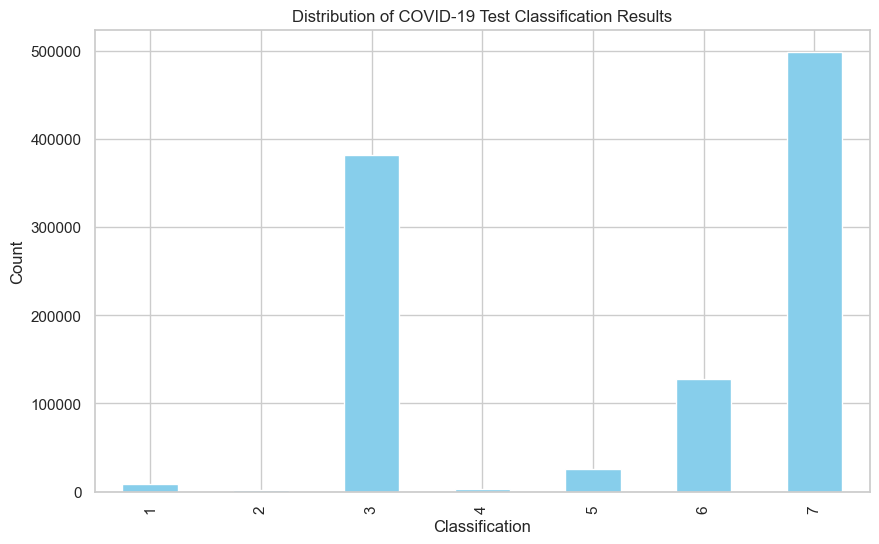

In [16]:
# Load the new dataset provided by the user
data2 = pd.read_csv('covid_data.csv')

# Display the first few rows of the data to understand its structure
data2.head()

# Configure visual style
sns.set(style="whitegrid")

# 1. Distribution of COVID-19 classification
plt.figure(figsize=(10, 6))
data2['CLASIFFICATION_FINAL'].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Distribution of COVID-19 Test Classification Results")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.show()

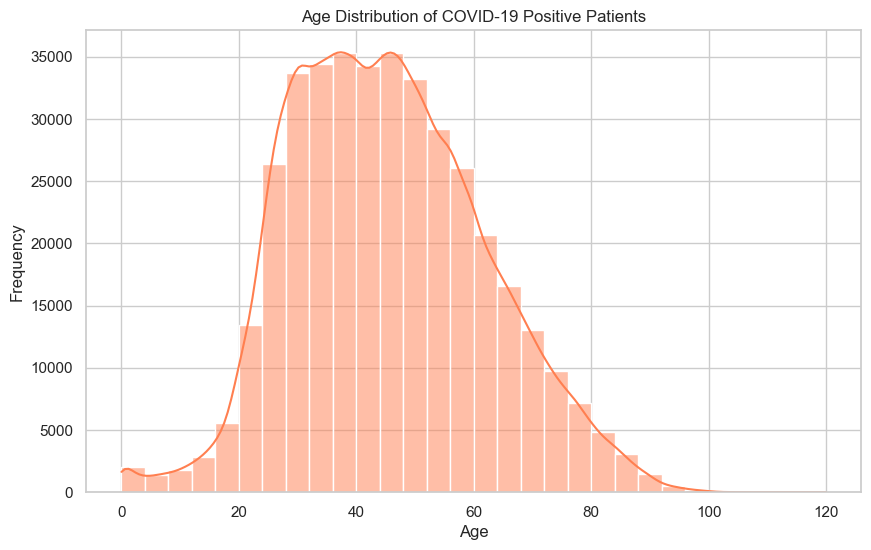

In [7]:
# 2. Age distribution of patients with COVID-19
covid_positive = data2[data2["CLASIFFICATION_FINAL"] < 4]  # Patients classified as positive for COVID-19
plt.figure(figsize=(10, 6))
sns.histplot(covid_positive["AGE"], bins=30, kde=True, color="coral")
plt.title("Age Distribution of COVID-19 Positive Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

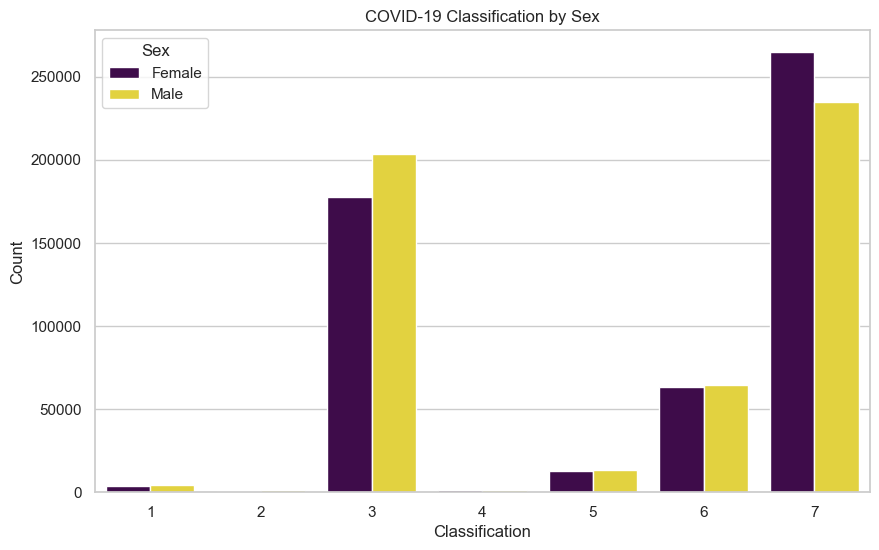

In [9]:
# 3. COVID-19 Classification by Sex
covid_data = data2.rename(columns=lambda x: x.strip())  # Remove any whitespace

# Plot: COVID-19 Classification by Sex
plt.figure(figsize=(10, 6))
sns.countplot(data=covid_data, x='CLASIFFICATION_FINAL', hue='SEX', palette='viridis')
plt.title('COVID-19 Classification by Sex')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

C:\Users\yagob\AppData\Local\Temp\ipykernel_2956\876881322.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=covid_data_filtered, x="ICU", palette="coolwarm")


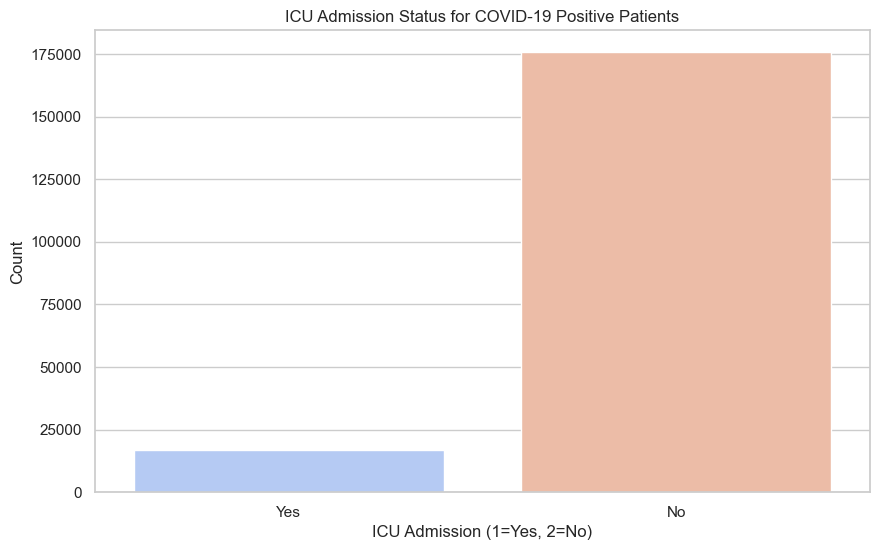

In [19]:
# 4. ICU Admission Status for COVID-19 Positive Patients
covid_data = covid_data.rename(columns=lambda x: x.strip())

# Filter out unknown values (97, 99) in the ICU column
covid_data_filtered = covid_data[covid_data["ICU"].isin([1, 2])]

# Plot ICU Admission Status for COVID-19 Positive Patients
plt.figure(figsize=(10, 6))
sns.countplot(data=covid_data_filtered, x="ICU", palette="coolwarm")
plt.title("ICU Admission Status for COVID-19 Positive Patients")
plt.xlabel("ICU Admission (1=Yes, 2=No)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Yes', 'No'])  # Setting readable labels for ICU admission status
plt.show()

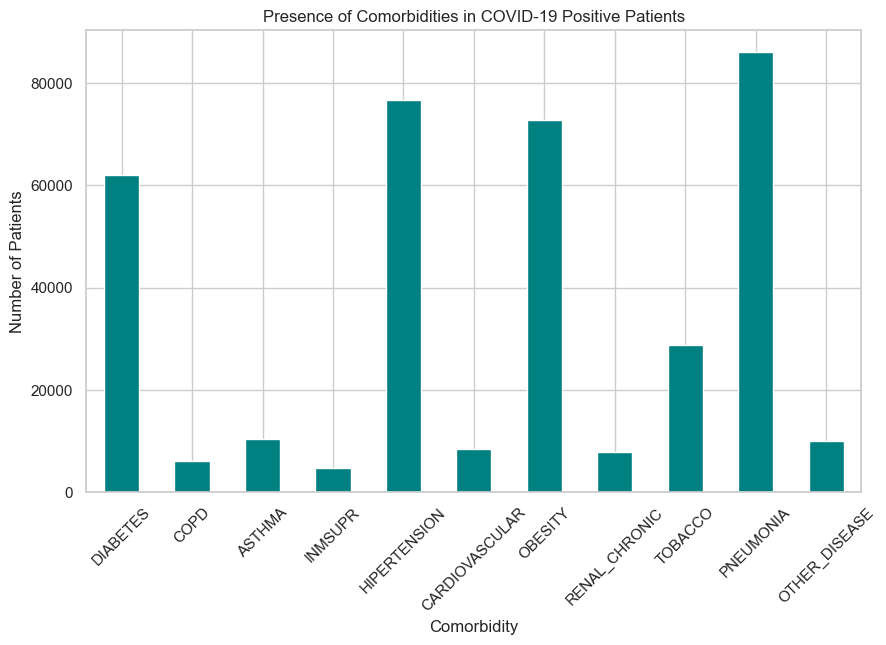

In [15]:
# 5. Presence of Comorbidities in COVID-19 Positive Patients
comorbidities = ["DIABETES", "COPD", "ASTHMA", "INMSUPR", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO", "PNEUMONIA", "OTHER_DISEASE"]
comorbidity_counts = covid_positive[comorbidities].apply(lambda x: (x == 1).sum())

plt.figure(figsize=(10, 6))
comorbidity_counts.plot(kind="bar", color="teal")
plt.title("Presence of Comorbidities in COVID-19 Positive Patients")
plt.xlabel("Comorbidity")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.show()

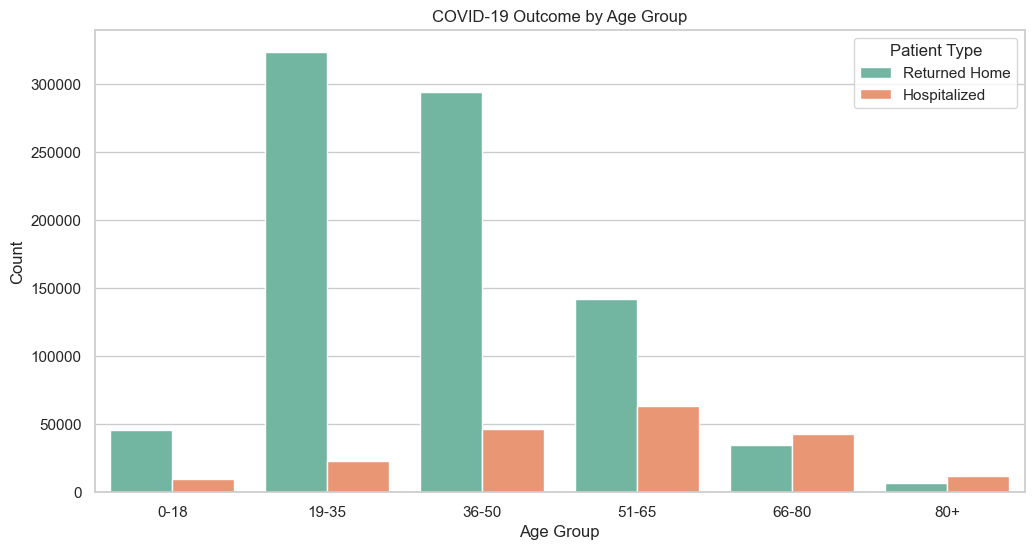

In [21]:
# Create age groups
covid_data['age_group'] = pd.cut(covid_data['AGE'], bins=[0, 18, 35, 50, 65, 80, 100], 
                                 labels=['0-18', '19-35', '36-50', '51-65', '66-80', '80+'])

# Plot Outcome by Age Group
plt.figure(figsize=(12, 6))
sns.countplot(data=covid_data, x='age_group', hue='PATIENT_TYPE', palette="Set2")
plt.title("COVID-19 Outcome by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title='Patient Type', labels=['Returned Home', 'Hospitalized'])
plt.show()


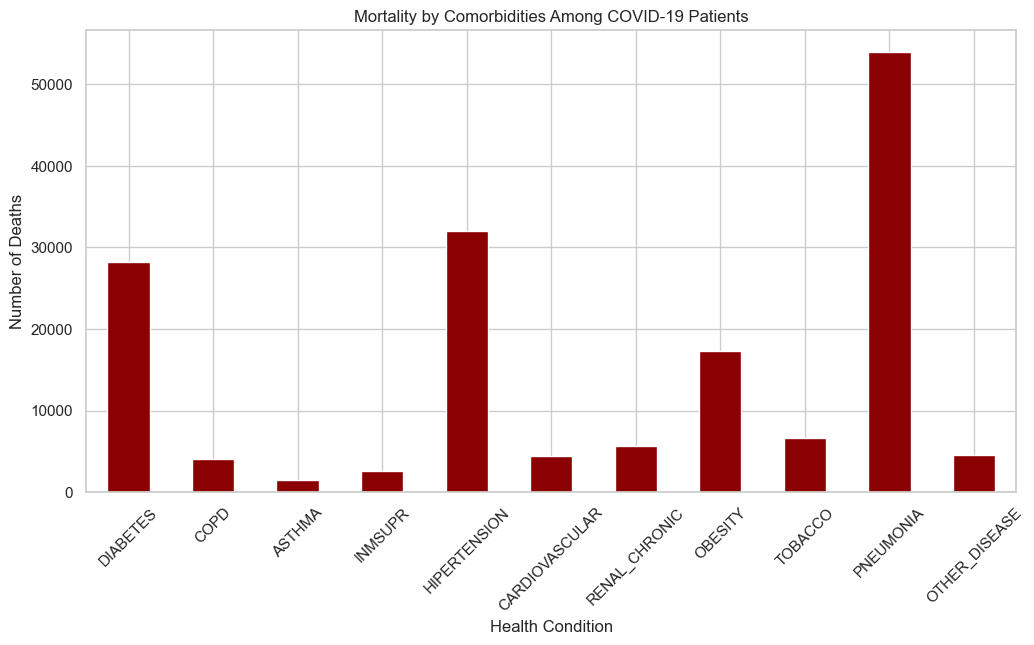

In [24]:
# Filtering patients who passed away
mortality_data = covid_data[covid_data['DATE_DIED'] != '9999-99-99']

# Mortality by Comorbidities
mortality_conditions = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 
                        'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY', 'TOBACCO', 'PNEUMONIA', 'OTHER_DISEASE']

mortality_counts = mortality_data[mortality_conditions].apply(pd.Series.value_counts).loc[1].fillna(0)

plt.figure(figsize=(12, 6))
mortality_counts.plot(kind='bar', color="darkred")
plt.title("Mortality by Comorbidities Among COVID-19 Patients")
plt.xlabel("Health Condition")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.show()


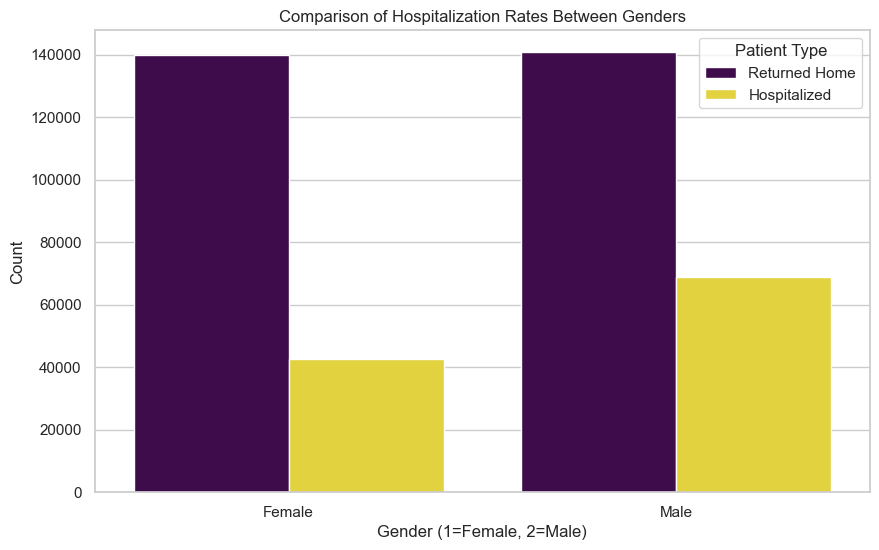

In [ ]:
# Filtering for COVID-19 positive cases and excluding unknowns
positive_cases = covid_data[(covid_data['CLASIFFICATION_FINAL'].isin([1, 2, 3])) & (covid_data['SEX'].isin([1, 2]))]

# Hospitalization rates by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=positive_cases, x="SEX", hue="PATIENT_TYPE", palette="viridis")
plt.title("Comparison of Hospitalization Rates Between Genders")
plt.xlabel("Gender (1=Female, 2=Male)")
plt.ylabel("Count")
plt.legend(title="Patient Type", labels=["Returned Home", "Hospitalized"])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

C:\Users\yagob\AppData\Local\Temp\ipykernel_2956\1423428053.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_filtered['ICU'] = covid_data_filtered['ICU'].replace({1: 1, 2: 0})


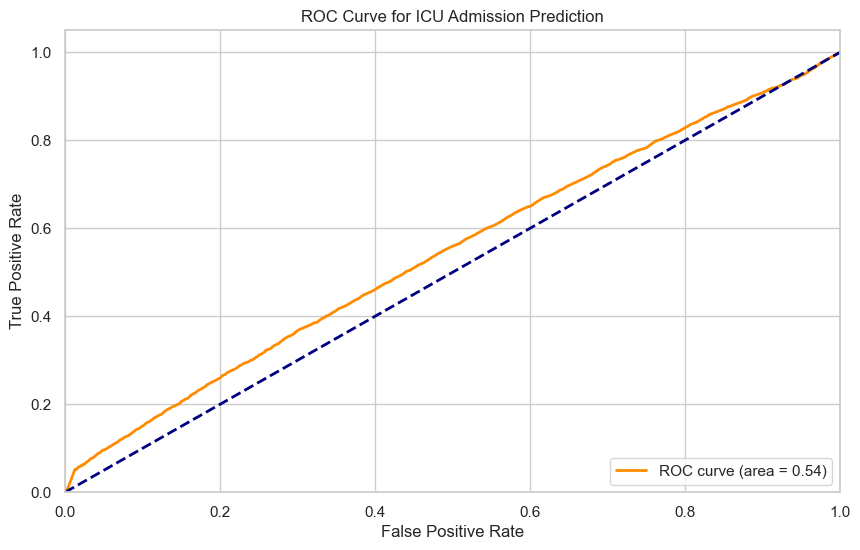

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Filter data to include only ICU (1) and non-ICU (2) cases
covid_data_filtered = covid_data[covid_data['ICU'].isin([1, 2])]

# Convert ICU values to binary (1 for ICU admission, 0 for non-ICU admission)
covid_data_filtered['ICU'] = covid_data_filtered['ICU'].replace({1: 1, 2: 0})

# Prepare features and target
features = covid_data_filtered[['AGE', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION', 'OBESITY']]
target = covid_data_filtered['ICU']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction and ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ICU Admission Prediction')
plt.legend(loc="lower right")
plt.show()
